# A Comprehensive Introduction to Monte Carlo Simulations
## Andrew Garcia, 2019 - 2020

_Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at_

http://www.apache.org/licenses/LICENSE-2.0
_Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License._

##### Table of Contents  
- [What are Monte Carlo methods?](#What-are-Monte-Carlo-methods?)  
- [Simple Monte Carlo](#Simple-Monte-Carlo)  
    * [Example: Monte Carlo Simulations for Six Sigma Process Control](#Monte-Carlo-Simulations-for-Six-Sigma-Process-Control:-Taffy-Making-Machine)
- [Metropolis Monte Carlo](#Metropolis-Monte-Carlo)  
    * [The probability of transition](#The-probability-of-transition)
    * [The rejection sampling criterion](#The-rejection-sampling-criterion)
    * [Example: Particle Grid of Ground and Excited States](#Particle-Grid-of-Ground-and-Excited-States)
- [Kinetic Monte Carlo](#Kinetic-Monte-Carlo)  


### What are Monte Carlo methods?

Monte Carlo (MC) methods are, typically, computational algorithms which can be used to predict the parameters of a certain event or properties correlated thereof, which tend to relate on the likelihood of these event's occurence.

Thus, MC methods can indirectly predict a property of a feature which is correlated to a certain event, as is the popular example for estimating the value of $\pi$ from the random sampling of points from the area of a circle enclosed by a square (https://academo.org/demos/estimating-pi-monte-carlo/)

### Simple Monte Carlo
**Estimating the standard deviation or spread of an independent variable**

In the purest sense, MC methods involve sampling from random distributions. We can use python to specify which distribution to draw samples from, though one can also use a specific probability density function (PDFN) were python not able to have the specified PDFN available. 

This sampling can be done easily with python's **numpy.random** module. Obviously enough, were we to sample enough points from a random distribution, we would form said distribution:

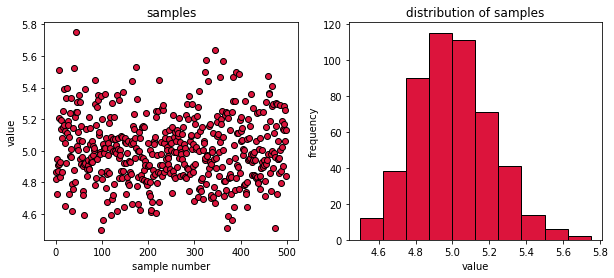

In [3]:
import random
import matplotlib.pyplot as plt

sampleno = 500
mean, sd = 5, 0.2 
k, x = 0, []
while k < sampleno: x.append(random.gauss(mean, sd)); k+=1

fig = plt.figure()
plt.subplot(1,2,1)
plt.plot(x,'o',markeredgecolor='k',color='crimson'), plt.title('samples'), plt.xlabel('sample number'), plt.ylabel('value')
plt.subplot(1,2,2)
plt.hist(x,color='crimson',edgecolor='k'), plt.title('distribution of samples'), plt.xlabel('value'), plt.ylabel('frequency')

fig.set_size_inches(10,4)
plt.show()


Now, let's say for simplicity we studying a variable which we know is a linear combination of two dependent variables X1 and X2:

$Y = C_1 X_1 + C_2 X_2$

Here we assume the coefficients $C_i$ have already been determined. Let's continue with a real world example:

#### Monte Carlo Simulations for Six Sigma Process Control: Taffy Making Machine

Let's assume we have a taffy making machine and want to estimate the *'softness'* of our candy ($Y$) from the  amount of salt added ($X_1$) and the calender speed ($X_2$) . Knowing our machine, the calender speed is not completely steady; it oscillates exactly $\pm$ 10 speed units from its input. There is also some human error in how much salt is added per batch, and from such we have estimated a standard deviation. 

Nonetheless, we have also performed a fit and found the coefficients for X1 and X2 to appropriately correlate them with Y. Thus, our system is defined the following way: 

$Y = 0.6 X_1 + 1.4 X_2$

$Y$: Softness

$X_1$: Amount of salt - Gaussian distribution;  $\sigma_1$ = 3

$X_2$: Calender speed - Uniform distribution; $Range$ = [a,b]   ;   {a,b} = <$X_2$> $\pm$ 10  

With this information we can estimate the statistical distribution of our output (candy softness) for any input value with a simple MC algorithm:

1) A sample from $X_1$'s distribution is chosen <br/>
2) A sample from $X_2$'s distribution is chosen <br/>
3) These two samples are operated with the function for $Y$ above <br/>
4) 1-3 is repeated N times to form a distribution for $Y$ 

In addition, let's say we have a customer and our customer needs the candy to have softness ratings between 55 and 75. We can place these requirements in our distribution for softness (dashed red lines) and check if our products meet the Six-Sigma requirement i.e. 99.7% of the candy falling within customer specifications.

This can all be easily done with python :

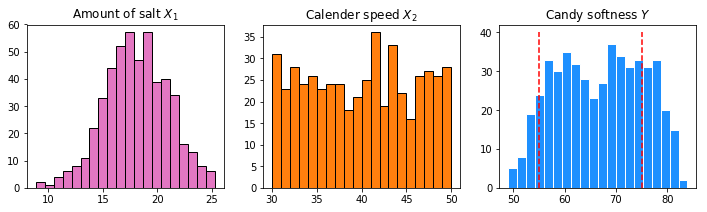

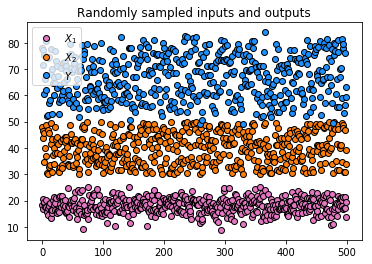

In [9]:
import numpy as np
def distgen(sampleno,dist_type,param1, param2):
    k, x = 0, []
    while k < sampleno: x.append(dist_type(param1,param2)); k+=1
    return np.array(x)

X1 = distgen(500,random.gauss,18, 3)
X2 = distgen(500,random.uniform,30, 50)

C1, C2 = 0.6,1.4
Y = C1*X1 + C2*X2

fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title('Amount of salt $X_1$')
plt.hist(X1,bins=20,color='C6',edgecolor='k')
plt.subplot(1, 3, 2)
plt.title('Calender speed $X_2$')
plt.hist(X2,bins=20,color='C1',edgecolor='k')
plt.subplot(1, 3, 3)
plt.title('Candy softness $Y$')
plt.hist(Y,bins=20,color='dodgerblue',edgecolor='w')
'customer specifications'
plt.vlines(55,0,40,linestyle='dashed',color='r')
plt.vlines(75,0,40,linestyle='dashed',color='r')
fig.set_size_inches(12,3)
plt.show()



plt.title('Randomly sampled inputs and outputs')
plt.plot(X1,'o',color='C6',markeredgecolor='k',label='$X_1$')
plt.plot(X2,'o',color='C1',markeredgecolor='k',label='$X_2$')
plt.plot(Y,'o',color='dodgerblue',markeredgecolor='k',label='$Y$'),plt.legend()
plt.show()


Through an optimization process I do not show here, we find that we need to replace our calender (a taffy pulling machine) with a new one which oscillates $\pm$ 3 speed units from 40. We make the modification of variable X2 and thus see the Candy softness distribution now meets our customer specifications

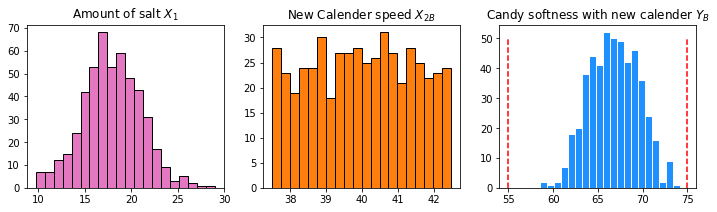

In [41]:
X1 = distgen(500,random.gauss,18, 3)
X2 = distgen(500,random.uniform,37.5, 42.5)

C1, C2 = 0.6,1.4
Y = C1*X1 + C2*X2

fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title('Amount of salt $X_1$')
plt.hist(X1,bins=20,color='C6',edgecolor='k')
plt.subplot(1, 3, 2)
plt.title('New Calender speed $X_{{2B}}$')
plt.hist(X2,bins=20,color='C1',edgecolor='k')
plt.subplot(1, 3, 3)
plt.title('Candy softness with new calender $Y_B$')
plt.hist(Y,bins=20,color='dodgerblue',edgecolor='w')
'customer specifications'
plt.vlines(55,0,50,linestyle='dashed',color='r')
plt.vlines(75,0,50,linestyle='dashed',color='r')
fig.set_size_inches(12,3)
plt.show()


A Six-Sigma process can also be simplified as one where the customer requirements are within 3 standard deviations from the mean in both directions. 

For a simple sanity check, we can fit the blue distribution $Y$ to a probability density function. Assuming the distribution of $Y$ is Gaussian, the center and spread parameters are simply normal mean and standard deviation, respectively, and can be calculated easily:

In [42]:
print('mean',np.mean(Y))
print('sdev',np.std(Y))

mean 66.73731760745893
sdev 2.7284582577944736


With this information we can then the assessment of whether it meets six-sigma:

In [45]:
print('customer specifications: \nlowest value: 55 softness \nhighest value: 75 softness\n')
mean, thrsigma = np.mean(Y), 3*np.std(Y)
print('process output information')
print('mean - 3 sigma:', mean-thrsigma)
print('mean + 3 sigma:', mean+thrsigma)
print('\nmeets six-sigma')

customer specifications: 
lowest value: 55 softness 
highest value: 75 softness

process output information
mean - 3 sigma: 58.55194283407551
mean + 3 sigma: 74.92269238084235

meets six-sigma


If the $Y$ distribution is not Gaussian, we can fit it to a probability density function (PDFN) and get the parameters thereof (e.g. mean, spread, kurtosis, etc..). We can load **frame_pdsfit.py** from my **/statistics** repository to do so (see ***/statistics/pdsfit_tutorial*** to learn more) :

In [50]:
import sys
sys.path.append(r'C:\Users\garci\Dropbox (Personal)\scripts\statistics')

from frame_pdsfit import *
make(Y,'Candy softness (Y)',['gauss','lognorm','beta'])


Candy softness (Y)
normal_mean 66.73731760745893
normal_sdev 2.7284582577944736

Candy softness (Y)
lognorm_s/sigma 0.014868772777025342
lognorm_loc -116.45972826229604
lognorm_scale/median/exp_mean 183.17861514648894

Candy softness (Y)
beta_a 7.619393160334519
beta_b 6.93534936022474
beta_c 55.46402354260499
beta_d 21.53675086371367


(['normal_mean',
  'normal_sdev',
  'lognorm_s/sigma',
  'lognorm_loc',
  'lognorm_scale/median/exp_mean',
  'beta_a',
  'beta_b',
  'beta_c',
  'beta_d'],
 [66.73731760745893,
  2.7284582577944736,
  0.014868772777025342,
  -116.45972826229604,
  183.17861514648894,
  7.619393160334519,
  6.93534936022474,
  55.46402354260499,
  21.53675086371367])

One can see the mean and standard deviation obtained from numpy are the same as those obtained from a Gaussian fit of the generated $Y$ data. You may also notice that this distribution (histogram) is the same as the one obtained from **distgen()** (because it's the same data!)

### Metropolis Monte Carlo

A subset of Markov Chain Monte Carlo (MCMC) techniques, this method was [for the most part] developed by Nicholas Metropolis in the 1940s for the Manhattan Project to calculate neutron transport rates in various materials and thus predict the explosive behavior of various fission weapons being designed at the time. 

It is a powerful statistical analysis algorithm which can make good estimates on the equilibrium properties of a physical system by generating random configurations sampled from the system's corresponding statistical mechanics distribution. Though time cannot be accounted in a completely deterministic way, one can use MMC to study the evolution of a particular system. 

#### The probability of transition

Let's define a system with two energies, a ground state $E_g$ and an excited state $E_e$, where $E_e$ > $E_g$. 

Assuming we place a particle in the ground state, we let the system have 4 probabilties: 

$P(g)$ = probability of finding a particle in the ground state

$P(e)$ = probability of finding a particle in the excited state

$P_g(e)$ = probability of transition to the excited state

$P_e(g)$ = probability of transition to the ground state

The probability of finding the particle in either of these states ($P(e)$ or $P(g)$) can be represented by defining the aforementioned probability using the canonical ensemble:

$P_g$ =  $Q^{-1}$ $e^{E_g/k_B T}$

and thus, we vanish the partition function by taking the ratio thereof:

$P_e$/$P_g$ = $e^{\Delta E/k_B T}$

We can apply Bayes theorem and, consequently, the principle of microscopic reversibility to derive an expression for the probability of transition to the excited state:

$P_g(e)$ $P(e)$ = $P_e(g)$ $P(g)$

Then substituting into the ratio of probabilities, 

$P_g(e)$ / $P_e(g)$ =  $e^{\Delta E/k_B T}$

Defining the system to ALWAYS go to ground state from excited state ($P_e(g)$ = 1):


$P_g(e)$ =  $e^{\Delta E/k_B T}$

#### The rejection sampling criterion

A Metropolis Monte Carlo simulation evaluates whether or not the transition occurs by checking if said probability is higher than a random number between 0 and 1:

- if $e^{\Delta E/k_B T}$ > random.uniform(0,1)
      accept transition
- else 
      reject


The rationale behind this criterion lies in an infinite sampling of random particles from 0-1 below the new distribution (ratio of two distributions) approaching the area thereof, i.e. its cumulative density function. I simulate this graphically using the script below:

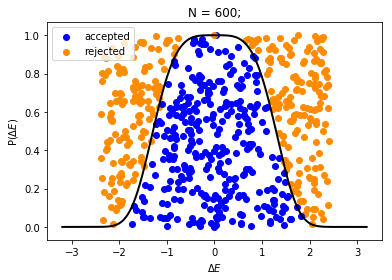

In [5]:
import random as ran
import numpy as np
import matplotlib.pyplot as plt

#function for a Gaussian
def pdf(x,sigma):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp((-x**2)/(2*sigma)**2)

#E as a function of x
def Ei(x):
    return (1/np.pi)*(x)**2

def accrej(n):
    
    #plot a Gaussian with the following parameters:
    sigma, x_e = 0.5, np.linspace(-4,4,500)
    
    x_g = x_e/5 
    
    P = pdf(Ei(x_e),sigma) / pdf(Ei(x_g),sigma)

    plt.figure()
    plt.ylabel('P($\Delta E$)')
    plt.xlabel('$\Delta E$')
    plt.plot(x_e-x_g,P,linewidth=2,color='k')
    
    
    #the rejection sampling algorithm explained graphically
    k=0  
    while k < n:
        xs, ys = ran.uniform(-3,3), ran.uniform(0,1)
        xs_g = xs/5
        Pxs = pdf(Ei(xs),sigma) / pdf(Ei(xs_g),sigma)
        [plt.scatter(xs-xs_g,ys,color='b') if Pxs > ys else plt.scatter(xs-xs_g,ys,color='darkorange')]
        plt.title('N = {};'.format(k+1))
        k+=1
        
    plt.scatter(0,0,color='b', label='accepted'), plt.scatter(0,1,color='darkorange',label='rejected')
    plt.legend()
    plt.show()

accrej(600)

#### Particle Grid of Ground and Excited States

In this example I use Metropolis Monte Carlo to "simulate" a grid of particles in ground and excited states at different temperatures $T$ and energy barriers $\Delta E$. Ground and excited states will be represented as empty and filled circles, respectively.

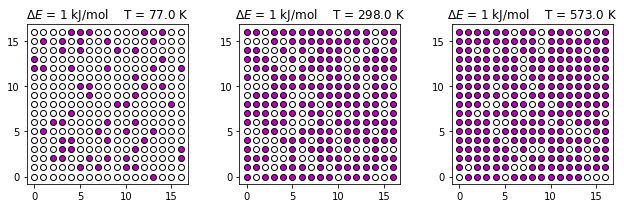

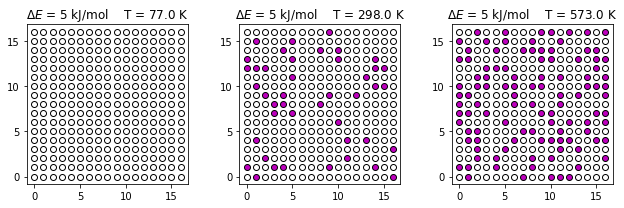

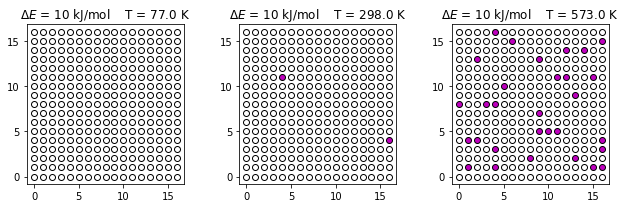

In [3]:
import numpy as np
import random as ran
import matplotlib.pyplot as plt

def P(dE,kBT):
    return np.exp(-dE/kBT) 

R = 8.314e-3 #kJ mol-1 K-1
def atoms(N,dE,kBT):
    #k = 0
    L = int(np.sqrt(N))
    for i in range(L):
        for j in range(L):
            dE_fluc = ran.gauss(dE,0.001)  
            plt.plot(i,j,'o',color='m',markeredgecolor='k') if P(dE_fluc,kBT) > ran.uniform(0,1) \
            else plt.plot(i,j,'o',color='w',markeredgecolor='k')
            
    plt.title('$\Delta E$ = {} kJ/mol    T = {} K'.format(np.round(dE,2),kBT/R))
    

def atomgrids(N,dE):
    T1,T2,T3 = 77, 298, 573
    T = [T1,T2,T3]
    #plotting
    fig = plt.figure()
    for i in range(3):
        plt.subplot(1, 3, i+1)
        atoms(N,dE,R*T[i])

    fig.set_size_inches(9,3)
    fig.tight_layout()
    plt.show()
    
atomgrids(300,1)
atomgrids(300,5)
atomgrids(300,10)

With the canonical ensemble, kinetics are more favorableat higher $T$, whereas lower $\Delta E$ bring the transition to excited state barrier down and thus make it more probable. Thus, we get more particles in the excited state at high values of $T$ and low $\Delta E$

### Kinetic Monte Carlo (KMC)

This is also a method I know well. However, the explanation is a bit dense so I'd rather refer you to the following sources which I feel explains the method best. The general section is sorted in order of relevance. Happy reading [if interested in KMC]. -Andrew

**KMC General**

Kratzer, P. (2009) *Monte Carlo and kinetic Monte Carlo methods -- a tutorial*
(https://pdfs.semanticscholar.org/5a8f/7bb5e83c8f982004d8f75bf68cf0cf7fcce7.pdf)

Arthur F. Voter (2007) *Introduction to the Kinetic Monte Carlo Method* (https://link.springer.com/chapter/10.1007/978-1-4020-5295-8_1)

Kristen A. Fichthorn, and W. H. Weinberg (1991) *Theoretical foundations of dynamical
Monte Carlo simulations* (https://doi.org/10.1063/1.461138)

Mie Andersen, Chiara Panosetti and Karsten Reuter (2019) *A Practical Guide to Surface Kinetic Monte Carlo Simulations*(https://doi.org/10.3389/fchem.2019.00202)

Jansen, A.P.J. (2003) *An Introduction to Kinetic Monte Carlo Simulations of Surface Reactions* (https://arxiv.org/abs/cond-mat/0303028)


**KMC for chemical reaction networks**

Gillespie, D. (1976) *A general method for numerically simulating the stochastic time evolution of coupled chemical reactions
Author links open overlay panel* (https://doi.org/10.1016/0021-9991(76)90041-3)

Gillespie, D. (1977) *Exact stochastic simulation of coupled chemical reactions* (https://doi.org/10.1021/j100540a008)
